## HPC EX 1

### Initialization

In [39]:
import os
import numpy as np
import scipy
# If you have matplotlib 1.5 or higher, we can use live plotting!
import matplotlib as mpl
if float(mpl.__version__[:3]) >= 1.5:
    %matplotlib notebook
else:
    %matplotlib inline
    
import matplotlib.pyplot as plt
import time
import flowFunc

####################################################################
######################## Start calculations ########################
####################################################################

nRows = 10
nCols = 10
nCh = 9

timesteps = 300
# velocity vector for matrix indices starting top left
c = np.array([[0,0], [0,1], [-1,0], [0,-1], [1,0], [-1,1], [-1,-1], [1,-1], [1,1]])
# lattice
f = np.zeros((nRows, nCols, nCh), dtype = float)
# weights for initial distribution
w = np.array([4/9, 1/9, 1/9, 1/9, 1/9, 1/36, 1/36, 1/36, 1/36])

# initial lattice distribution f
f = flowFunc.f_init(f, w)

#initial rho
rho = np.ones((4,4))

# attenuation factor
omega = 1
assert omega <= 1.7

# initialize shear wave decay 
epsilon = 0.01
assert epsilon < 0.1

### Start with initial rho

In [40]:
rho0 = 0.8
rho = flowFunc.set_rho(epsilon, rho0, nRows, nCols)
u = np.zeros((nRows, nCols, 2))

# Belegung des lattice, dass das mit rho, welches ich in der funktion set_rho berechnet habe, passt
f = flowFunc.calc_equilibrium(rho, u, c, w) # which is equal to f_eq

# sanity check if calculation of rho is equal to predefined rho in function above
assert np.isclose(rho, flowFunc.get_rho(f), rtol=1e-15, atol=1e-20, equal_nan=False).all() == True, 'Rho init failed'

### Scattering

[ 0.8         0.80587785  0.80951057  0.80951057  0.80587785  0.8
  0.79412215  0.79048943  0.79048943  0.79412215]
After 300.000000 timesteps: [ 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8]


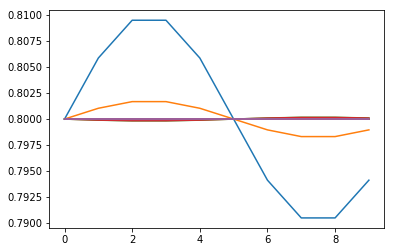

In [41]:
%matplotlib inline
plt.figure()
print(rho[0,:])
# time loop
for t in range(timesteps):
    
    if t%20 == 0:
        plt.plot(rho[0,:])
    # shift distribution f
    f = flowFunc.shift_f(f)
    # get partial current density j
    j = flowFunc.calc_j(c, f)
    # get current density rho
    rho = flowFunc.get_rho(f)
    # get average velocity
    u = flowFunc.calc_avg_vel(rho, j)
    # get local equilibrium distributions
    feQ = flowFunc.calc_equilibrium(rho, u, c, w)
    # update distribution
    f += omega * (feQ - f)
    
print('After %f timesteps: %s' %(timesteps, rho[0,:]))

### Plot

In [ ]:
rows = 7
cols = 5
q = 9
timesteps = 20

latt = np.zeros((rows, cols, q), dtype = float)
# initial lattice occupation


fig = plt.gcf()
fig.show()
fig.canvas.draw()

for i in range(5,6):
    ch = i
    latt[1, 2, ch] = 1.0
    # loop over timesteps
    for t in range(timesteps):
        latt = flowFunc.per_shift(latt)
        plt.imshow(latt[:,:,ch], cmap='gray',  interpolation='nearest')
        fig.canvas.draw()